# Bellevue University 
## DSC540-T302 Data Preparation: Summer 2021
### Yograj Karki 
Week 3 & 4 Assignments <br>
Activity 6 <br>
06/25/2021

In this activity, you will work with the Adult Income Dataset from the UCI
machine learning portal. The Adult Income dataset has been used in many
machine learning papers that address classification problems. You will read
the data from a CSV file into a pandas DataFrame and do some practice on
the advanced data wrangling you learned about in this chapter.

1. Load the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2. Read in the adult income data set (given as a .csv file) from the working directory

In [2]:
df = pd.read_csv("adult_income_data.csv")
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,<=50K


3. Create a script that will read a text file line by
line.

In [3]:
names = []
with open('adult_income_names.txt','r') as file:
    for line in file:
        file.readline()
        var=line.split(":")[0]
        names.append(var)

names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

4. Add a name of Income for the response
variable to the dataset.

In [4]:
# Adding a new column "Income"
names.append("Income")

# Opening the income data file with column names
df1 = pd.read_csv("adult_income_data.csv",names=names)
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


5. Find the missing values.

In [5]:
df1.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

6. Create a DataFrame with only age, education,
and occupation by using subsetting.

In [6]:
subset1 = df1[['age','education','occupation']]
subset1.head()


,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty


7. Plot a histogram of age with a bin size of 20.

<AxesSubplot:>

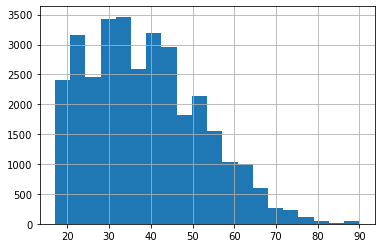

In [7]:
# Histogram of age distribution
subset1.age.hist(bins=20)

8. Create a function to strip the whitespace
characters.

In [8]:
def strip_whitespace(s):
    return s.strip()

9. Use the apply method to apply this function
to all the columns with string values, create a
new column, copy the values from this new
column to the old column, and drop the new
column.

In [9]:
# Education column
subset1['education_stripped']=df1['education'].apply(strip_whitespace)
subset1['education']=subset1['education_stripped']
subset1.drop(labels=['education_stripped'],axis=1,inplace=True)

# Occupation column
subset1['occupation_stripped']=df1['occupation'].apply(strip_whitespace)
subset1['occupation']=subset1['occupation_stripped']
subset1.drop(labels=['occupation_stripped'],axis=1,inplace=True)

# Marital status
subset1['marital_stripped']=df1['marital-status'].apply(strip_whitespace)
subset1['race']=subset1['marital_stripped']
subset1.drop(labels=['marital_stripped'],axis=1,inplace=True)

# Relationship
subset1['relationship_stripped']=df1['relationship'].apply(strip_whitespace)
subset1['relationship']=subset1['relationship_stripped']
subset1.drop(labels=['relationship_stripped'],axis=1,inplace=True)

subset1.head()

<ipython-input-9-5bdfe49aa153>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset1['education_stripped']=df1['education'].apply(strip_whitespace)
<ipython-input-9-5bdfe49aa153>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset1['education']=subset1['education_stripped']
/Users/ykarki1/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.p

,age,education,occupation,race,relationship
0,39,Bachelors,Adm-clerical,Never-married,Not-in-family
1,50,Bachelors,Exec-managerial,Married-civ-spouse,Husband
2,38,HS-grad,Handlers-cleaners,Divorced,Not-in-family
3,53,11th,Handlers-cleaners,Married-civ-spouse,Husband
4,28,Bachelors,Prof-specialty,Married-civ-spouse,Wife


10. Find the number of people who are aged
between 30 and 50.

In [10]:
age_filtered = subset1[(subset1.age >=30) & (subset1.age<=50)]
print(f" There are {age_filtered.shape[0]} people who are aged between 30 and 50.")

 There are 16390 people who are aged between 30 and 50.


11. Group the records based on age and education
to find how the mean age is distributed.

In [11]:
subset1.groupby(["education"]).mean()

,age
education,
10th,37.429796
11th,32.355745
12th,32.000000
1st-4th,46.142857
5th-6th,42.885886
7th-8th,48.445820
9th,41.060311
Assoc-acdm,37.381443
Assoc-voc,38.553546


12. Group by occupation and show the summary
statistics of age. Find which profession has the
oldest workers on average and which
profession has its largest share of the
workforce above the 75th percentile.

In [12]:
subset1.groupby(['occupation']).describe()['age']

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
?,1843.0,40.882800,20.336350,17.0,21.0,35.0,61.0,90.0
Adm-clerical,3770.0,36.964456,13.362998,17.0,26.0,35.0,46.0,90.0
Armed-Forces,9.0,30.222222,8.089774,23.0,24.0,29.0,34.0,46.0
Craft-repair,4099.0,39.031471,11.606436,17.0,30.0,38.0,47.0,90.0
Exec-managerial,4066.0,42.169208,11.974548,17.0,33.0,41.0,50.0,90.0
Farming-fishing,994.0,41.211268,15.070283,17.0,29.0,39.0,52.0,90.0
Handlers-cleaners,1370.0,32.165693,12.372635,17.0,23.0,29.0,39.0,90.0
Machine-op-inspct,2002.0,37.715285,12.068266,17.0,28.0,36.0,46.0,90.0
Other-service,3295.0,34.949621,14.521508,17.0,22.0,32.0,45.0,90.0


13. Use subset and groupby to find outliers.

In [13]:
education_stats= subset1.groupby('education').describe()['age']
education_stats

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,933.0,37.429796,16.720713,17.0,22.00,34.0,52.0,90.0
11th,1175.0,32.355745,15.545485,17.0,18.00,28.0,43.0,90.0
12th,433.0,32.000000,14.334625,17.0,19.00,28.0,41.0,79.0
1st-4th,168.0,46.142857,15.615625,19.0,33.00,46.0,57.0,90.0
5th-6th,333.0,42.885886,15.557285,17.0,29.00,42.0,54.0,84.0
7th-8th,646.0,48.445820,16.092350,17.0,34.25,50.0,61.0,90.0
9th,514.0,41.060311,15.946862,17.0,28.00,39.0,54.0,90.0
Assoc-acdm,1067.0,37.381443,11.095177,19.0,29.00,36.0,44.0,90.0
Assoc-voc,1382.0,38.553546,11.631300,19.0,30.00,37.0,46.0,84.0


14. Plot the values on a bar chart.

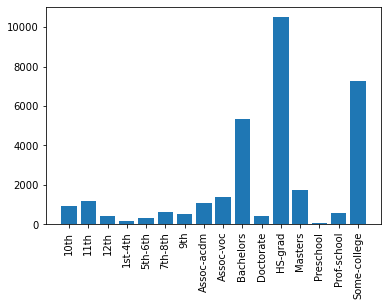

In [14]:
plt.bar(x=education_stats.index, height=education_stats['count'])

plt.xticks(rotation = 90)

plt.show()


15. Merge the data using common keys.

In [15]:
merged_df = pd.merge(df1, subset1, on="occupation", how = "inner").drop_duplicates()

3. Create a series and practice basic arithmetic steps <br>
a. Series 1 = 7.3, -2.5, 3.4, 1.5<br>
    i. Index = ‘a’, ‘c’, ‘d’, ‘e’<br>
b. Series 2 = -2.1, 3.6, -1.5, 4, 3.1<br>
    i. Index = ‘a’, ‘c’, ‘e’, ‘f’, ‘g’<br>
c. Add Series 1 and Series 2 together and print the results<br>
d. Subtract Series 1 from Series 2 and print the results<br>

In [16]:
series1 = pd.Series(data = [7.3, -2.5, 3.4, 1.5], copy=False, index=['a','b','d','e'])
series2 = pd.Series(data = [-2.1, 3.6, -1.5, 4, 3.1], copy=False, index=['a','c','e','f','g'])


In [17]:
# add series 1 and series 2
series1.add(series2)

a    5.2
b    NaN
c    NaN
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [18]:
#Subtract Series 1 from Series 2 and print the results
series1.subtract(series2)

a    9.4
b    NaN
c    NaN
d    NaN
e    3.0
f    NaN
g    NaN
dtype: float64